In [1]:
%load_ext autoreload
%autoreload 2

In [114]:
import os 
import sys

projRootPath =  os.path.abspath(os.path.join('.' ,"../.."))
print("Project root path is: ", projRootPath)
sys.path.append(projRootPath)

from src.utils.path_manipulation import contains_filetype
from src.utils.viz_functions import make_mel_spectrogram
from src.utils.sound_functions import mix_samples, read_mp3, write_mp3, pad_length_to_max

# modules for visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# modules for data processing
import numpy as np
import scipy
from scipy.io import wavfile
from statistics import median
import wave
import struct
import csv
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error 

# modules for data mining
from sklearn.decomposition import pca, FastICA

# and IPython.display for audio output
from tqdm.notebook import tqdm 
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

from pydub import AudioSegment

Project root path is:  D:\Programming\AudioMining


In [3]:
# Get data files
dataDirName = "data"
# rawDataDirName = os.path.join("raw", "mp3")
rawDataDirName = "converted_wav"
className1 = "violin"
className2 = "guitar"
data_path1 = os.path.join(projRootPath, dataDirName, rawDataDirName, className1)
data_path2 = os.path.join(projRootPath, dataDirName, rawDataDirName, className2)

# Get all files from data_path 
# r=root, d=directories, f = files
file_extension = ".wav"
(_, d, allFiles) = next(os.walk(data_path1))
soundFiles1 = [f for f in allFiles if f.endswith(file_extension)]

(_, d, allFiles) = next(os.walk(data_path2))
soundFiles2 = [f for f in allFiles if f.endswith(file_extension)]

In [4]:
sdata1 = []
sampleRates1 = []
soundFiles = soundFiles1
for indx, file in tqdm(enumerate(soundFiles)):
    fpath = os.path.join(data_path1, file)
#     soundSample, fs = read_mp3(fpath)
    fs, soundSample = wavfile.read(fpath)
    sdata1.append(soundSample)
    sampleRates1.append(fs)
        

In [5]:
sdata2 = []
sampleRates2 = []
soundFiles = soundFiles2
for indx, file in tqdm(enumerate(soundFiles)):
    fpath = os.path.join(data_path2, file)
#     soundSample, fs = read_mp3(fpath)
    fs, soundSample = wavfile.read(fpath)
    sdata2.append(soundSample)
    sampleRates2.append(fs)

print(sdata2[:3])


[array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([0, 0, 0, ..., 0, 0, 0], dtype=int16)]


In [105]:
# violin_note_file = "violin_C4_1_mezzo-piano_arco-normal.wav"
# violin_note_file = "violin_C4_phrase_forte_arco-staccato.wav"
# violin_note_file = "violin_A4_05_fortissimo_arco-normal.wav"
# violin_note_file = "violin_A4_1_fortissimo_arco-normal.wav"

# violin_note_file = "violin_C4_025_piano_arco-normal.wav"
violin_note_file = "violin_C5_05_piano_arco-normal.wav"
# violin_note_file = "violin_C6_1_piano_arco-normal.wav"


# guitar_note_file = "guitar_C4_very-long_forte_normal.wav"
# guitar_note_file = "guitar_C5_very-long_piano_harmonics.wav"
guitar_note_file = "guitar_C6_very-long_piano_normal.wav"

In [106]:
v_note, sampling_rate =  librosa.load(os.path.join(data_path1, violin_note_file), sr=44100)
g_note, sampling_rate =  librosa.load(os.path.join(data_path2, guitar_note_file), sr=44100)

The frequency with highest values is 526 Hz


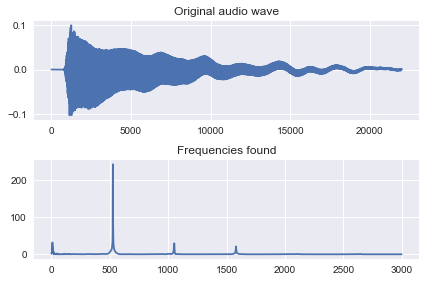

In [107]:
# Get fast fourier transform
data = np.array(g_note)
interval1 = 8000
interval2 = 30000
data_fft = np.fft.fft(data[interval1:interval2])

# This will give us the frequency we want
frequencies = np.abs(data_fft)
print("The frequency with highest values is {} Hz".format(np.argmax(frequencies)))

# Plot part of signal and fft
plt.subplot(2,1,1)
plt.plot(data[interval1:interval2])
plt.title("Original audio wave")
plt.subplot(2,1,2)
plt.plot(frequencies[0:3000])
plt.title("Frequencies found")
# plt.xlim(0,3000)
plt.tight_layout(pad=1.0)
plt.show()

In [108]:
# if dealing with time
def FFT(t, y):
    n = len(t)
    Δ = (max(t) - min(t)) / (n-1)
    k = int(n/2)
    f = np.arange(k) / (n*Δ)
    Y = abs(np.fft.fft(y))[:k]
    return (f, Y)

# if already have the sampling rate
def FFT_sr(sr, y):
    n = len(y)
    k = int(n/2)
    f = np.arange(k) / (n/sr)
    Y = abs(np.fft.fft(y))[:k]
    return (f, Y)

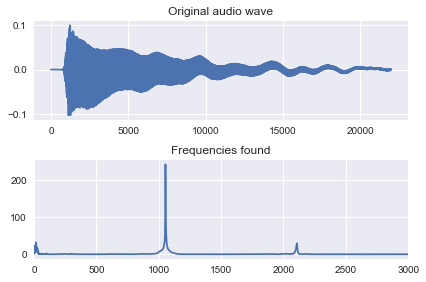

In [111]:
interval1 = 8000
interval2 = 30000
(f, Y) = FFT_sr(sampling_rate, data[interval1:interval2])

# Plot part of signal and fft
plt.subplot(2,1,1)
plt.plot(data[interval1:interval2])
plt.title("Original audio wave")
plt.subplot(2,1,2)
plt.plot(f, Y)
plt.title("Frequencies found")
plt.xlim(0,3000)
plt.tight_layout(pad=1.0)
plt.show()

c:\users\marius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


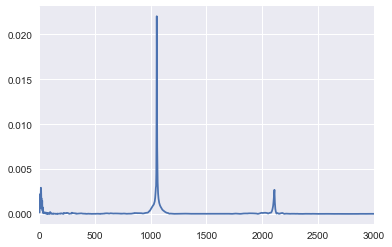

In [130]:
T = 1.0 / sampling_rate
N = len(data[interval1:interval2])
yf = scipy.fft(data[interval1:interval2])
xf = np.linspace(0.0, sampling_rate/2.0, N/2)
# xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set_xlim(0, 3000)
plt.show()

In [128]:
xf

array([0.00000000e+00, 2.00472770e+00, 4.00945541e+00, ...,
       2.20459905e+04, 2.20479953e+04, 2.20500000e+04])

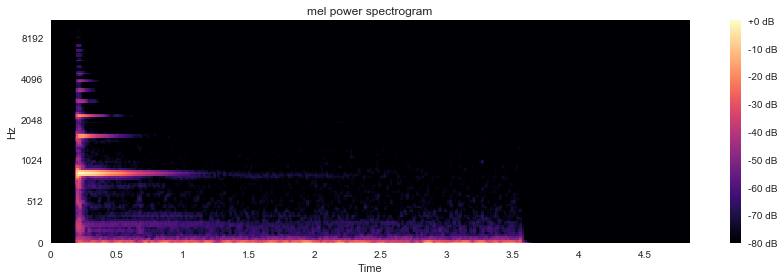

In [110]:
S = librosa.feature.melspectrogram(data, sr=fs, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=fs, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [26]:
IPython.display.Audio(data, rate=sampling_rate)

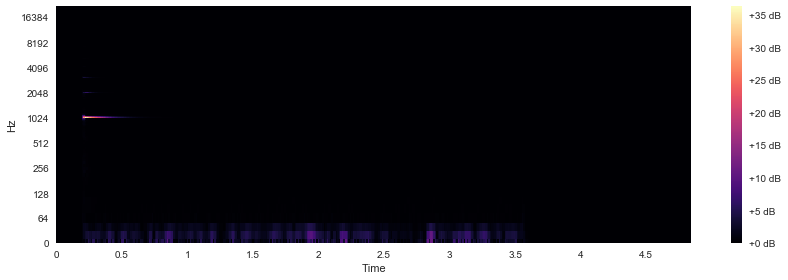

In [27]:
n_fft = 2048
stft = np.abs(librosa.stft(data, n_fft=n_fft))

plt.figure(figsize=(12,4))

librosa.display.specshow(stft, x_axis='time', y_axis='log', sr=fs)

# draw a color bar
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [20]:
stft.shape


(1025, 340)